In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

    과제 
    A B 그룹의 Box Plot을 그리고 이상치를 구하세요

- data load

<AxesSubplot:xlabel='species', ylabel='length'>

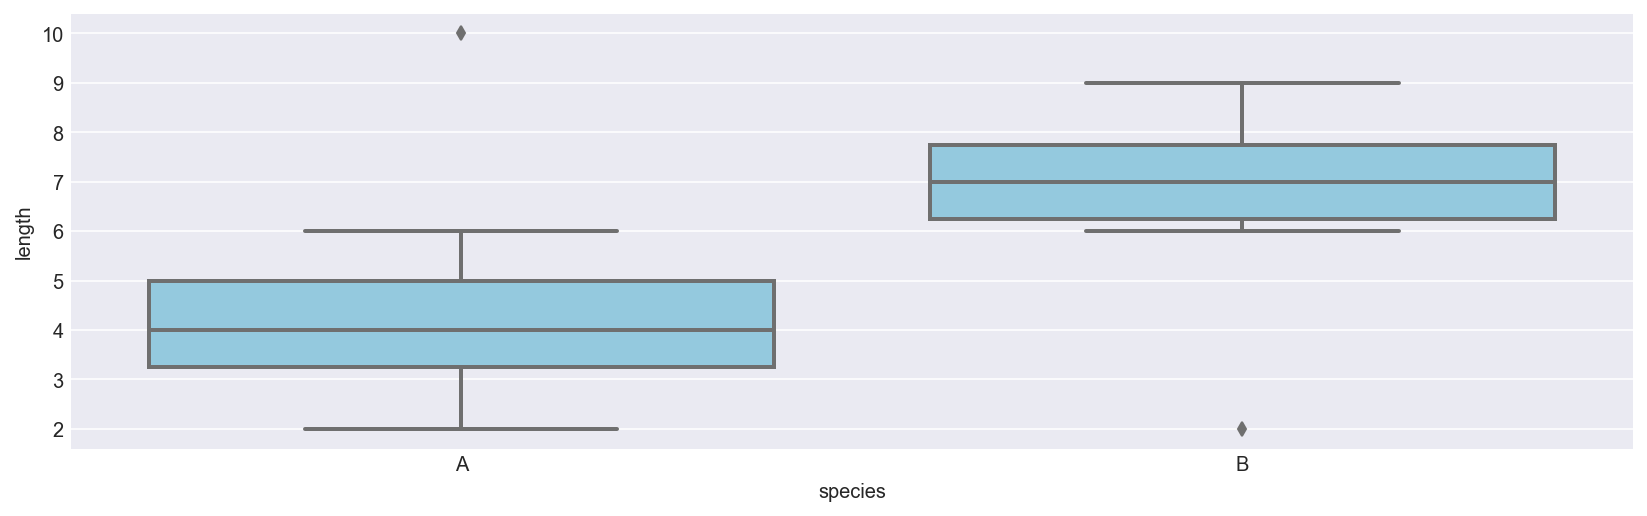

In [90]:
fish_multi = pd.read_csv('../Data/4_fm2.csv')
fish_multi.iloc[5,1] = 10
# #test
# fish_multi.iloc[3,1] = 30
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

In [85]:
#풀어쓰기
test1 = fish_multi.groupby('species')
A =test1.get_group('A')
B =test1.get_group('B')

a_Q1 = A.length.describe()['25%']
a_Q3 = A.length.describe()['75%']
b_Q1 = B.length.describe()['25%']
b_Q3 = B.length.describe()['75%']

a_IQR = a_Q3 - a_Q1
b_IQR = b_Q3 - b_Q1

A_ol=A[(A['length']<(a_Q1 - 1.5*a_IQR)) | (A['length'] > (a_Q3 + 1.5*a_IQR))]
B_ol=B[(B['length']<(b_Q1 - 1.5*b_IQR)) | (B['length'] > (b_Q3 + 1.5*b_IQR))]

Fish_outlier = A_ol.merge(B_ol,how='outer')
Fish_outlier

,species,length
0,A,30
1,A,10
2,B,2


In [93]:
#사용자 함수 생성 by 아름님
def find_outlier(x):
    Q1,Q3 = np.percentile(x,[25,75])
    IQR = Q3 - Q1
    outlier = x.loc[(x < (Q1 - 1.5*IQR)) | (x > (Q3 + 1.5 * IQR))].tolist()
    return outlier

fish_multi.groupby('species').agg(find_outlier)

,length
species,
A,[10]
B,[2]


    과제 - 추가 decoration / 막대그래프


range(0, 10)
[6 9 5 3 2 4 5 7 8 3]


Text(0.5, 0, 'x')

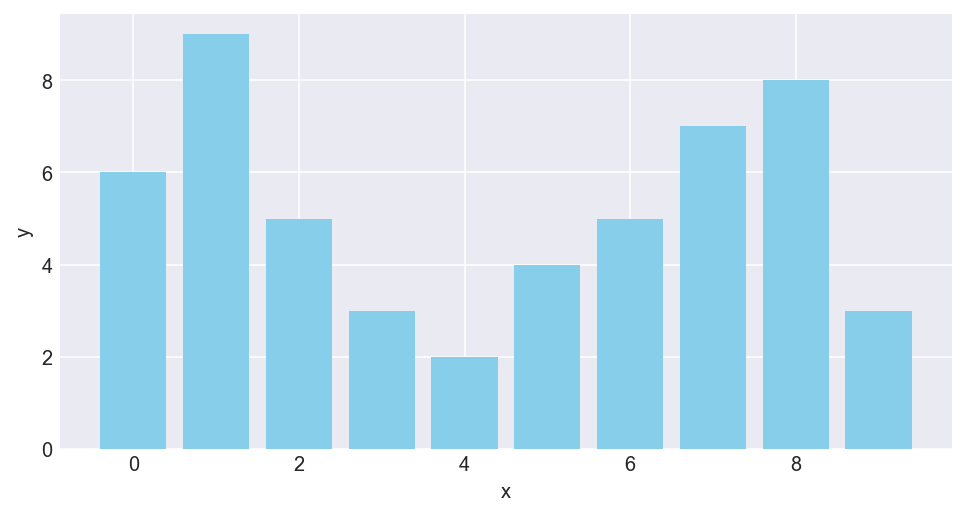

In [95]:
# 문제 값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')


range(0, 10)
[5 8 2 2 7 9 6 2 4 4]


Text(0.5, 1.0, 'Decoration')

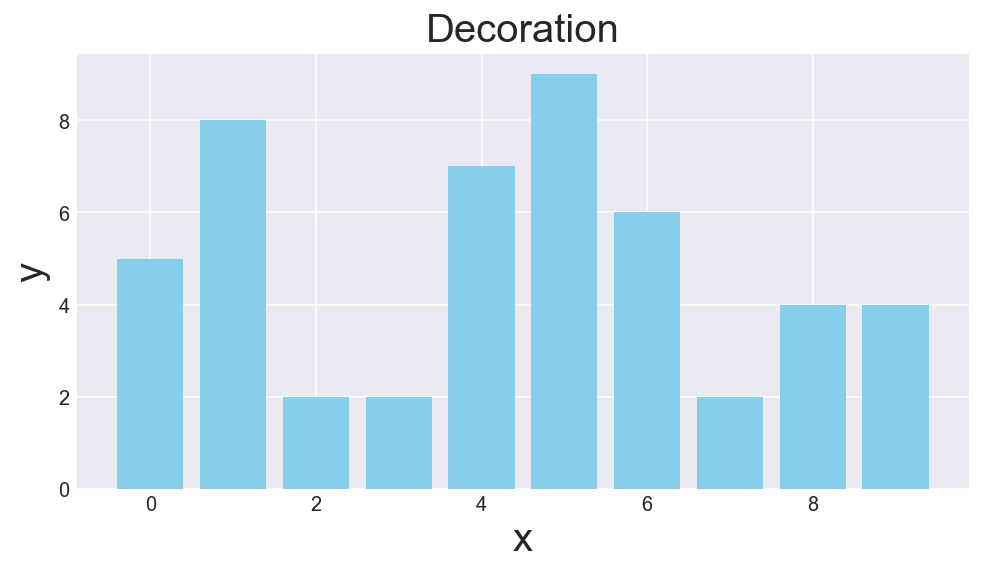

In [102]:
# 결과값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
# 1. 폰트 크기 변경
plt.ylabel('y',fontsize=20) 
plt.xlabel('x',fontsize=20)
# 2. Title생성
plt.title('Decoration',fontsize=20)


    과제
    Q. hist, line, bar, scatter 그래프 4개를 서브플록으로 출력하세요